## 앙상블 종류
1. bagging : 데이터셋 생성 : 복원추출 (모델개수만큼 데이터셋을 생성한다) => 모델링
2. Random Forest : 배깅과 동일. 하지만 선택되는 X변수(독립변수)가 변경됨
3. Gradient Boosting : 배깅과 동일. 하지만 첫번째 모델을 만든 후 오차를 계산해 오차를 줄여나가는 변수를 선택해 나가는 방식. 학습 방식(0.1 ~ 1)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
df_raw = pd.read_csv('체질검사.csv', encoding = 'cp949')
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop('FAT', axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))11
print("test data Y size : {}".format(df_test_x.shape))

train data X size : (176, 13)
train data Y size : (176,)
test data X size : (76, 13)
test data Y size : (76, 13)


In [4]:
rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))


Score on training set : 0.934
Score on test set : 0.552


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [5]:
train_score = []; test_score = []

para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n['n_estimator'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

In [6]:
df_score_n.round(3)

,n_estimator,TrainScore,TestScore
0,10,0.934,0.552
1,20,0.945,0.600
2,30,0.951,0.615
3,40,0.954,0.613
4,50,0.954,0.610
5,60,0.956,0.614
6,70,0.955,0.614
7,80,0.955,0.612
8,90,0.956,0.610
9,100,0.956,0.611


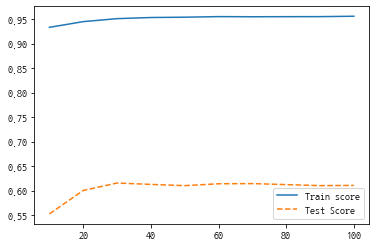

In [8]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.legend()


In [9]:
train_score = []; test_score = [];

para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state = 1234,
                              n_estimators = 100,
                              min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

In [10]:
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [11]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.956,0.611
1,2,0.939,0.610
2,3,0.915,0.611
3,4,0.891,0.617
4,5,0.869,0.622
5,6,0.849,0.627
6,7,0.830,0.626
7,8,0.816,0.621
8,9,0.800,0.619
9,10,0.786,0.619


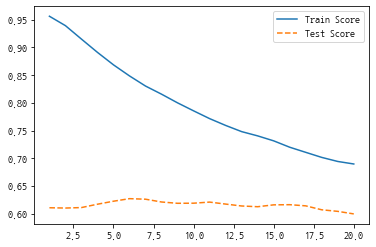

In [13]:
plt.plot(para_leaf, train_score, linestyle = "-", label  = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label  = "Test Score")
plt.legend()

In [21]:
train_score = []; test_score = [];

para_split = [n_split * 2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state = 1234,
                              n_estimators = 100,
                              min_samples_leaf = 6,
                              min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

In [22]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.849,0.627
1,6,0.849,0.627
2,8,0.849,0.627
3,10,0.849,0.627
4,12,0.849,0.627
5,14,0.839,0.629
6,16,0.831,0.629
7,18,0.821,0.628
8,20,0.813,0.628
9,22,0.803,0.628


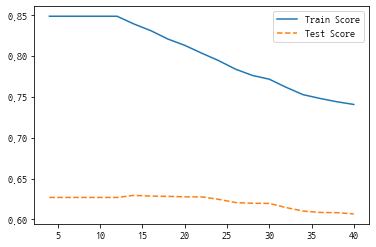

In [23]:
plt.plot(para_split, train_score, linestyle = "-", label  = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label  = "Test Score")
plt.legend()

In [29]:
train_score = []; test_score = [];

para_depth = [n_depth for n_depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state = 1234,
                              n_estimators = 100,
                              min_samples_leaf = 6,
                              min_samples_split = 12,
                              max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['MinSamplesSplit'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

In [30]:
df_score_depth.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,1,0.557,0.448
1,2,0.721,0.598
2,3,0.791,0.619
3,4,0.831,0.626
4,5,0.846,0.628
5,6,0.848,0.627
6,7,0.849,0.627
7,8,0.849,0.627
8,9,0.849,0.627
9,10,0.849,0.627


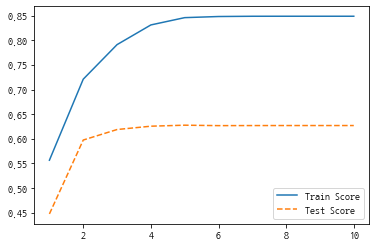

In [31]:
plt.plot(para_depth, train_score, linestyle = "-", label  = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label  = "Test Score")
plt.legend()

In [32]:
rf_final = RandomForestRegressor(random_state = 1234,
                                n_estimators = 100,
                                min_samples_leaf = 6,
                                min_samples_split = 14,
                                max_depth = 4)
rf_final.fit(df_train_x, df_train_y)
print("score on training set : {}".format(rf_final.score(df_train_x, df_train_y)))
print("score on test set : {}".format(rf_final.score(df_test_x, df_test_y)))

score on training set : 0.8245945310440618
score on test set : 0.6272281414182838


In [33]:
estimator = RandomForestRegressor()

param_grid = {"criterion" : ["mse", "friedman_mse","mae"],
             "max_features" : ["auto","sqrt","log2"],
             "min_samples_leaf" : para_leaf,
             "min_samples_split" : para_split}
grid_dt = GridSearchCV(estimator, param_grid, scoring = "r2",
                      n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model :\n{}".format(grid_dt.best_estimator_))
print("\nbest parameter : \n{}".format(grid_dt.best_params_))
print("\nbest score : \n{}".format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model :
RandomForestRegressor(bootstrap=True, criterion='friedman_mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

best parameter : 
{'criterion': 'friedman_mse', 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 4}

best score : 
0.685


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [40]:
estimator = RandomForestRegressor(random_state = 1234)
param_grid = {"max_depth" : para_depth,
             "min_samples_split" : para_split,
             "min_samples_leaf" : para_leaf}
grid_dt = GridSearchCV(estimator, param_grid, scoring = "r2",
                      n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model : \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter : \n{}".format(grid_dt.best_params_))
print("\nbest score : \n{}".format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model : 
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1234,
                      verbose=0, warm_start=False)

best parameter : 
{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 4}

best score : 
0.685


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [54]:
rf_final = RandomForestRegressor(random_state = 234,
                                n_estimators = 400,
                                min_samples_leaf = 6,
                                min_samples_split = 17,
                                max_depth = 4)

rf_final.fit(df_train_x, df_train_y)
print("score on training set : {}".format(rf_final.score(df_train_x, df_train_y)))
print("score on test set : {}".format(rf_final.score(df_test_x, df_test_y)))

score on training set : 0.8156710049470303
score on test set : 0.6204176088702691
